<a href="https://colab.research.google.com/github/Ebasurtos/MISTI/blob/main/BASURTO_SIUCE%2C_Eder_IntrotoModelTraining_NeuralNetworks_EXERCISES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you haven't already, please hit :**

`File` -> `Save a Copy in Drive`

**to copy this notebook to your Google drive, and work on a copy. If you don't do this, your changes won't be saved!**

# Train a Simple Neural Network for Regression with the California Housing Dataset

## Download the California Housing Datset

In [8]:
# TASK 2 EXERCISE

# Create a small dummy dataset
X_train = torch.randn(100, 10)
y_train = torch.randn(100)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=10)

# Define the model, loss function, and optimizer
input_size = 10
model = NeuralNetwork(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_model(model, train_loader, criterion, optimizer)

Epoch 1/20, Loss: 1.0610
Epoch 2/20, Loss: 0.9530
Epoch 3/20, Loss: 0.8911
Epoch 4/20, Loss: 0.8353
Epoch 5/20, Loss: 0.7851
Epoch 6/20, Loss: 0.7372
Epoch 7/20, Loss: 0.6953
Epoch 8/20, Loss: 0.6562
Epoch 9/20, Loss: 0.6187
Epoch 10/20, Loss: 0.5832
Epoch 11/20, Loss: 0.5490
Epoch 12/20, Loss: 0.5169
Epoch 13/20, Loss: 0.4826
Epoch 14/20, Loss: 0.4537
Epoch 15/20, Loss: 0.4229
Epoch 16/20, Loss: 0.3950
Epoch 17/20, Loss: 0.3675
Epoch 18/20, Loss: 0.3422
Epoch 19/20, Loss: 0.3167
Epoch 20/20, Loss: 0.2934


In [1]:
# Import Packages

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import networkx as nx
from torch.utils.data import DataLoader, TensorDataset
import torch

## Train a Neural Network model to Predict Median House Value

Below, we provide a function which can help you visualize the neural network you are creating with an example output from this function as well.

In [2]:
def visualize_nn_from_model(model):
    """
    Visualizes a neural network architecture from a PyTorch nn.Module.

    Args:
    - model (nn.Module): The PyTorch model to visualize.

    The function interprets linear layers and activation functions, then
    plots a graph representation of the architecture.
    """
    layers = []
    for layer in model.network:
        if isinstance(layer, nn.Linear):
            layers.append(f"Linear ({layer.in_features} → {layer.out_features})")
        elif isinstance(layer, nn.ReLU):
            layers.append("ReLU")
        elif isinstance(layer, nn.Sigmoid):
            layers.append("Sigmoid")
        elif isinstance(layer, nn.Tanh):
            layers.append("Tanh")
        # Add more cases for other layers as needed

    # Build visualization graph
    G = nx.DiGraph()
    positions = {}
    y_offset = 0

    for idx, layer in enumerate(layers):
        node_name = f"L{idx}: {layer}"
        G.add_node(node_name)
        positions[node_name] = (0, -y_offset)
        y_offset += 1

    # Add edges
    for i in range(len(layers) - 1):
        G.add_edge(f"L{i}: {layers[i]}", f"L{i+1}: {layers[i+1]}")

    # Draw the graph
    plt.figure(figsize=(10, len(layers) * 1.5))
    nx.draw(
        G,
        pos=positions,
        with_labels=True,
        node_size=3000,
        node_color="lightblue",
        edge_color="gray",
        arrows=True
    )
    plt.title("Neural Network Architecture", fontsize=16)
    plt.axis("off")
    plt.show()

### EXERCISE: Define a Simple Neural Network Model

Your objective is to define and implement a simple feedforward neural network with the following structure:
- Input layer: Accepts the input features.
- Hidden layer 1: 128 neurons with ReLU activation.
- Hidden layer 2: 64 neurons with ReLU activation.
- Output layer: A single neuron (for regression tasks).


Tasks:
1. Define the Neural Network Model
  - Create a class named NeuralNetwork that inherits from nn.Module. Inside the class:
    - Implement the __init__ method to define the network architecture using nn.Sequential. Include the following:
      - A linear layer connecting the input to 128 neurons using the method `nn.Linear(~)`.
      - A ReLU activation function using the method `nn.ReLU(~)`.
      - A linear layer connecting 128 neurons to 64 neurons using the method `nn.Linear(~)`.
      - Another ReLU activation function using the method `nn.ReLU(~)`.
      - A linear layer connecting 64 neurons to 1 output neuron using the method `nn.Linear(~)`.
    - You could alternately define a neural network using the `nn.Sequential(~)` method. This is easier, but less flexible.
2. Verify your implementation by creating a dummy input tensor, and running it through your neural network model. *Remember, you haven't trained it yet.*

#### TASK 1: Build a Neural Network Class

In [10]:
# TASK 1 EXERCISE

class NeuralNetwork(nn.Module):

    def __init__(self, input_size):
        """
        Initialize the neural network model.

        Args:
            input_size (int): Number of features in the input data.
        """
        # Call the constructor of the parent class (nn.Module)
        super(NeuralNetwork, self).__init__()
        # Define the network architecture
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

#### Task 2: Validate your Neural Network Class

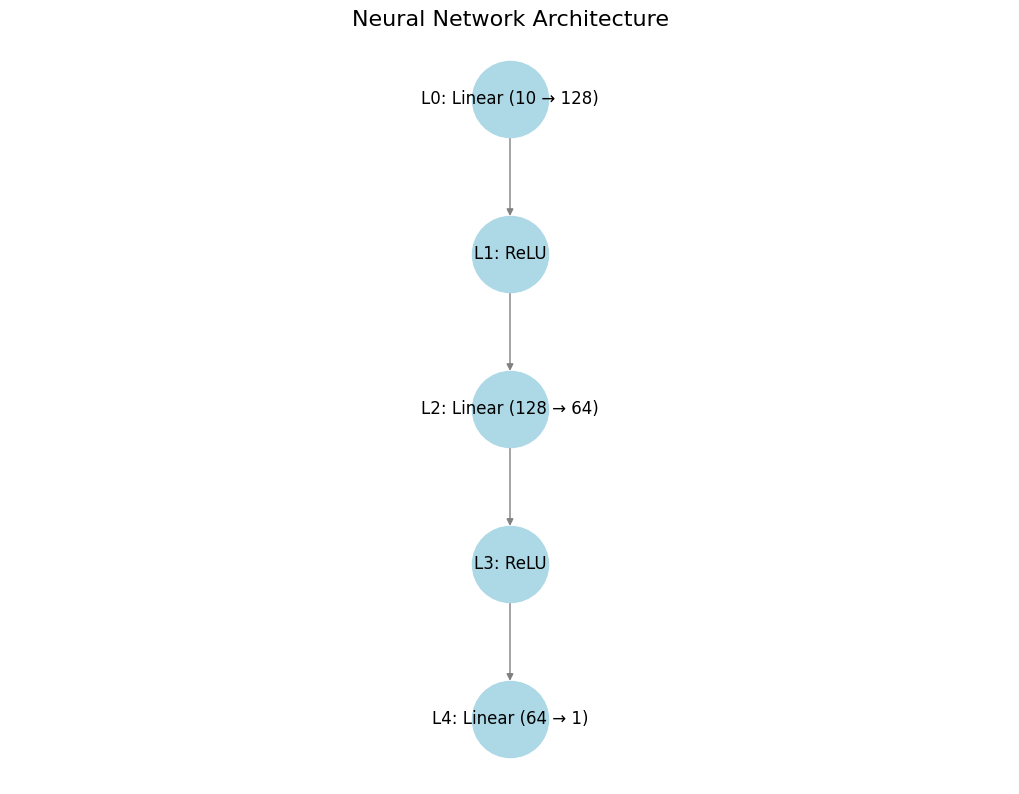

Output shape: torch.Size([1, 1])
Output: tensor([[-0.0346]], grad_fn=<AddmmBackward0>)


In [9]:
# TASK 2 EXERCISE

# Create an Instance of your Neural Network Class
input_size = 10  # Example input size
model = NeuralNetwork(input_size)  # Initialize the model

# Visualize your Model
visualize_nn_from_model(model)

# Create a dummy input tensor
dummy_input = torch.randn(1, input_size)  # Batch size of 1
output = model(dummy_input)  # Forward pass
print("Output shape:", output.shape)
print("Output: " + str(output))

### EXERCISE: Write a function to Train your Neural Network Model

Now, we are going to build a function which then trains the neural network model.

Tasks:
1. Define the training function:
  - For each batch of data:
    - Reset the gradients using `optimizer.zero_grad()`.
    - Perform a forward pass through the model.
    - Calculate the loss using the `criterion(~)` function.
    - Perform backpropagation using `loss.backward()`.
    - Update the model weights using `optimizer.step()`.
2. Train your model with a synthetic dataset.

#### TASK 1: Build a function to Train your Neural Network Model

In [11]:
# TASK 1 EXERCISE

def train_model(model, train_loader, criterion, optimizer, epochs=20):
    """
    Train a neural network model.

    Args:
        model: The neural network model to train.
        train_loader: DataLoader for the training dataset.
        criterion: Loss function to minimize.
        optimizer: Optimization algorithm to update model weights.
        epochs (int): Number of epochs to train for.
    """

    model.train()  # Set model to training mode

    for epoch in range(epochs):

        running_loss = 0.0

        for data, targets in train_loader:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(data).squeeze()  # Forward pass where .squeeze() removes any unnecessary dimensions
            loss = criterion(outputs, targets)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            running_loss += loss.item()  # Accumulate loss where .item() turns the tensor into a float

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

    pass

#### TASK 2: Validate your Training Function

In [16]:
# TASK 2 EXERCISE

# Create a small dummy dataset
X_train = torch.randn(100, 10)
y_train = torch.randn(100)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=10)

# Define the model, loss function, and optimizer
input_size = 10
model = NeuralNetwork(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_model(model, train_loader, criterion, optimizer)

Epoch 1/20, Loss: 0.9107
Epoch 2/20, Loss: 0.8266
Epoch 3/20, Loss: 0.7816
Epoch 4/20, Loss: 0.7429
Epoch 5/20, Loss: 0.7085
Epoch 6/20, Loss: 0.6760
Epoch 7/20, Loss: 0.6454
Epoch 8/20, Loss: 0.6147
Epoch 9/20, Loss: 0.5841
Epoch 10/20, Loss: 0.5544
Epoch 11/20, Loss: 0.5244
Epoch 12/20, Loss: 0.4944
Epoch 13/20, Loss: 0.4648
Epoch 14/20, Loss: 0.4356
Epoch 15/20, Loss: 0.4075
Epoch 16/20, Loss: 0.3784
Epoch 17/20, Loss: 0.3513
Epoch 18/20, Loss: 0.3250
Epoch 19/20, Loss: 0.2994
Epoch 20/20, Loss: 0.2752


### EXERCISE: Make the California Housing Dataset Amenable with PyTorch Dataloaders

Tasks:
1. Create a custom dataset class `NewDataset`
  - Accept data (features) and targets (labels) as input.
  - Implement the `__len__()` method to return the number of samples.
  - Implement the `__getitem__()` method to return a sample and its corresponding label as tensors.


#### TASK 1: Create a Custom Dataset Class

In [17]:
# TASK 1 EXERCISE

# Custom Dataset
class NewDataset(Dataset):

    def __init__(self, data, targets):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]

# Load and preprocess the California Housing Dataset
def load_data(test_size=0.2, batch_size=32):

    # Fetch dataset
    housing = fetch_california_housing()
    data, targets = housing.data, housing.target

    # Standardize features
    scaler = StandardScaler()
    data = scaler.fit_transform(data)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=test_size, random_state=42)

    # Create PyTorch Datasets
    train_dataset = NewDataset(X_train, y_train)
    test_dataset = NewDataset(X_test, y_test)

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

# Hyperparameters
batch_size = 32
test_size = 0.2
learning_rate = 0.001
epochs = 20

# Load data
train_loader, test_loader = load_data(test_size, batch_size)

# Iterate through the train_loader and print the shape of data and labels
for batch_idx, (data, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}:")
    print(f"  Data shape: {data.shape}")
    print(f"  Labels shape: {labels.shape}")
    break  # Stop after the first batch for inspection

Batch 1:
  Data shape: torch.Size([32, 8])
  Labels shape: torch.Size([32])


### Validate your Model

The following code defines two functions to assess a model's performance: `evaluate_model`, which computes key regression metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score using predictions from a test dataset, and `plot_predictions`, which visualizes the relationship between predicted and actual values to help evaluate the model's fit.

In [18]:
# Evaluate the Model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for data, targets in test_loader:
            outputs = model(data).squeeze()
            y_true.extend(targets.numpy())
            y_pred.extend(outputs.numpy())
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return y_true, y_pred

# Plot Predicted vs Actual Values
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, label='Predicted vs Actual')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2, label='Ideal Fit')
    plt.title("Predicted vs Actual Values")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid()
    plt.show()

#### EXERCISE: Train and Validate your Neural Network Model on the California Housing Dataset

Now, let's apply our neural network to a real-world dataset by training it on the California Housing Dataset. We'll need to prepare our data and initialize the model with appropriate parameters.

Tasks:
1. Prepare the Data and Initialize the Model
  - Load the **California Housing dataset** using a data-loading function (e.g., `load_data()`).
  - **Determine the input size** by extracting the number of features from the training data batch.
  - **Initialize your neural network model**, specifying the correct input size.
  - **Set up the loss function** using **`nn.MSELoss()`** and the optimizer using **`optim.Adam()`**.
2. Train, Evaluate, and Plot Results
  - **Train the model** using the `train_model()` function.  
  - **Evaluate the model** using the `evaluate_model()` function to compute predictions on the test set.
  - **Plot predictions** using the `plot_predictions()` function.

##### TASK 1: Prepare the Data and Initialize the Model

In [19]:
# TASK 1 EXERCISE

# Hyperparameters
batch_size = 32
test_size = 0.2
learning_rate = 0.001
epochs = 20

# Load data
train_loader, test_loader = load_data(test_size, batch_size)

# Initialize model, loss function, and optimizer
input_size = next(iter(train_loader))[0].shape[1]  # Get number of features
model = NeuralNetwork(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

##### TASK 2: Train, Evaluate, and Plot Results

Training the model...
Epoch 1/20, Loss: 0.6788
Epoch 2/20, Loss: 0.3811
Epoch 3/20, Loss: 0.3579
Epoch 4/20, Loss: 0.3467
Epoch 5/20, Loss: 0.3250
Epoch 6/20, Loss: 0.3149
Epoch 7/20, Loss: 0.3085
Epoch 8/20, Loss: 0.3044
Epoch 9/20, Loss: 0.2987
Epoch 10/20, Loss: 0.2974
Epoch 11/20, Loss: 0.2929
Epoch 12/20, Loss: 0.2869
Epoch 13/20, Loss: 0.2864
Epoch 14/20, Loss: 0.2816
Epoch 15/20, Loss: 0.2800
Epoch 16/20, Loss: 0.2751
Epoch 17/20, Loss: 0.2753
Epoch 18/20, Loss: 0.2728
Epoch 19/20, Loss: 0.2717
Epoch 20/20, Loss: 0.2701

Evaluating the model...
Mean Squared Error (MSE): 0.2784
Root Mean Squared Error (RMSE): 0.5276
R² Score: 0.7876


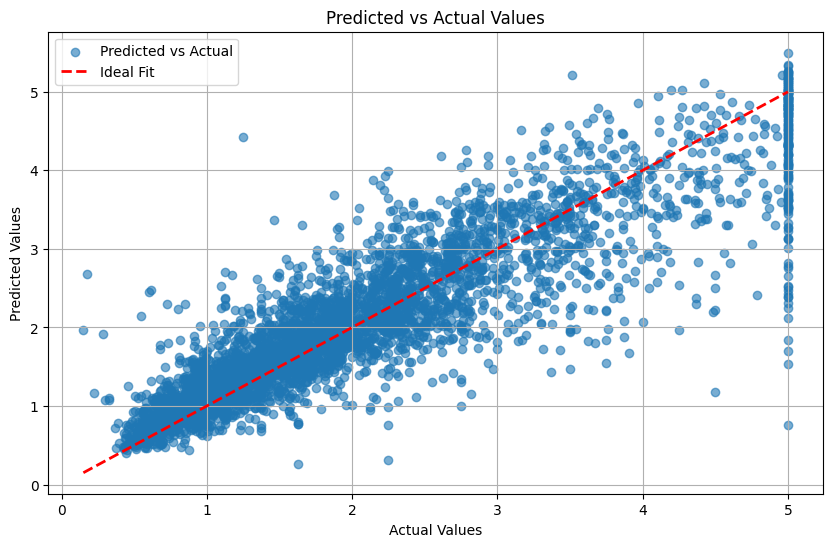

In [20]:
# TASK 2 SOLUION

# Train and evaluate
print("Training the model...")
train_model(model, train_loader, criterion, optimizer, epochs)

# Evaluate the model
print("\nEvaluating the model...")
y_true, y_pred = evaluate_model(model, test_loader, criterion)

# Plot predictions
plot_predictions(y_true, y_pred)

## (Optional) Hyperparameters

### ANALYZE: Build a Function to Test Different Sets of Hyperparameters

In [21]:
# Function to tune and evaluate
def tune_hyperparameters(batch_size, learning_rate, hidden_layer_sizes, epochs):

    print(f"Tuning: batch_size={batch_size}, learning_rate={learning_rate}, hidden_layers={hidden_layer_sizes}, epochs={epochs}")

    # Load data
    train_loader, test_loader = load_data(test_size=0.2, batch_size=batch_size)

    # Define the model
    class TunableNeuralNetwork(nn.Module):
        def __init__(self, input_size, hidden_layer_sizes):
            super(TunableNeuralNetwork, self).__init__()
            layers = []
            in_features = input_size
            for out_features in hidden_layer_sizes:
                layers.append(nn.Linear(in_features, out_features))
                layers.append(nn.ReLU())
                in_features = out_features
            layers.append(nn.Linear(in_features, 1))
            self.network = nn.Sequential(*layers)

        def forward(self, x):
            return self.network(x)

    input_size = next(iter(train_loader))[0].shape[1]
    model = TunableNeuralNetwork(input_size, hidden_layer_sizes)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_model(model, train_loader, criterion, optimizer, epochs)

    # Evaluate the model
    y_true, y_pred = evaluate_model(model, test_loader, criterion)

    # Metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"Metrics: MSE={mse:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")
    return mse, rmse, r2

# Example: Grid search over parameters
batch_sizes = [32, 64]
learning_rates = [0.001, 0.01]
hidden_layer_configs = [[24, 12], [6, 3]]
epoch_counts = [5, 10]

best_config = None
best_r2 = -np.inf
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for hidden_layers in hidden_layer_configs:
            for epochs in epoch_counts:
                mse, rmse, r2 = tune_hyperparameters(batch_size, learning_rate, hidden_layers, epochs)
                if r2 > best_r2:
                    best_r2 = r2
                    best_config = (batch_size, learning_rate, hidden_layers, epochs)

print(f"Best Configuration: batch_size={best_config[0]}, learning_rate={best_config[1]}, hidden_layers={best_config[2]}, epochs={best_config[3]}")

Tuning: batch_size=32, learning_rate=0.001, hidden_layers=[24, 12], epochs=5
Epoch 1/5, Loss: 1.2746
Epoch 2/5, Loss: 0.4578
Epoch 3/5, Loss: 0.4068
Epoch 4/5, Loss: 0.3891
Epoch 5/5, Loss: 0.3770
Mean Squared Error (MSE): 0.3907
Root Mean Squared Error (RMSE): 0.6251
R² Score: 0.7018
Metrics: MSE=0.3907, RMSE=0.6251, R²=0.7018
Tuning: batch_size=32, learning_rate=0.001, hidden_layers=[24, 12], epochs=10
Epoch 1/10, Loss: 1.4152
Epoch 2/10, Loss: 0.4816
Epoch 3/10, Loss: 0.4109
Epoch 4/10, Loss: 0.3864
Epoch 5/10, Loss: 0.3695
Epoch 6/10, Loss: 0.3625
Epoch 7/10, Loss: 0.3571
Epoch 8/10, Loss: 0.3484
Epoch 9/10, Loss: 0.3393
Epoch 10/10, Loss: 0.3445
Mean Squared Error (MSE): 0.3557
Root Mean Squared Error (RMSE): 0.5964
R² Score: 0.7285
Metrics: MSE=0.3557, RMSE=0.5964, R²=0.7285
Tuning: batch_size=32, learning_rate=0.001, hidden_layers=[6, 3], epochs=5
Epoch 1/5, Loss: 3.5798
Epoch 2/5, Loss: 0.5861
Epoch 3/5, Loss: 0.4820
Epoch 4/5, Loss: 0.4357
Epoch 5/5, Loss: 0.4156
Mean Squared 